## Code for study results and visuals

#### Get adjacency matrix

In [21]:
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import symmetrizations as symm
from sklearn.cluster import SpectralClustering
from sklearn.metrics import davies_bouldin_score

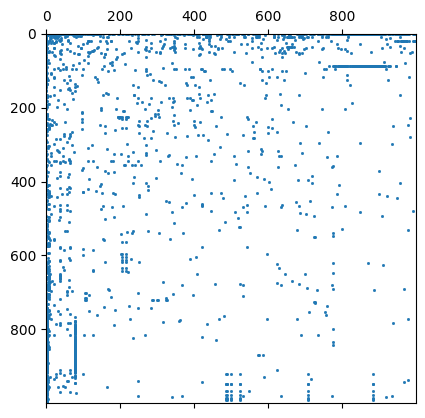

In [2]:
adjacency_matrix = symm.normalize_adj(np.load('./../data/postprocessing/adjacency.npy'))
plt.spy(adjacency_matrix, markersize=1)

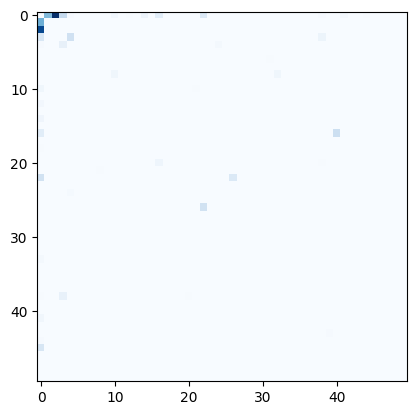

In [3]:
plt.imshow(adjacency_matrix[:50, :50], cmap='Blues')

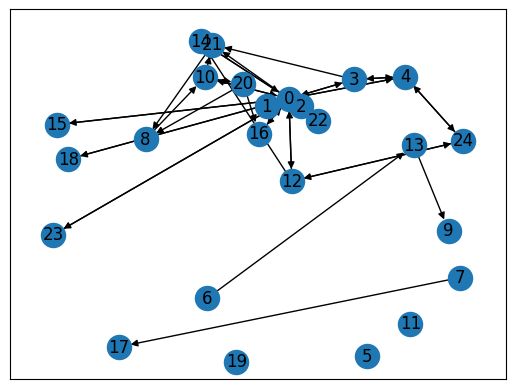

In [4]:
#show graph of first 100 nodes
graph = nx.from_numpy_array(adjacency_matrix[:25, :25], create_using=nx.DiGraph)
nx.draw_networkx(graph)

In [5]:
#get evaluation statistics
send_amt = np.sum(adjacency_matrix, axis=1)
receive_amt = np.sum(adjacency_matrix, axis=0)
send_transact = np.count_nonzero(adjacency_matrix, axis=1)
receive_transact = np.count_nonzero(adjacency_matrix, axis=0)

frame = np.vstack((send_amt, receive_amt, send_transact, receive_transact)).T

eval_df = pd.DataFrame(frame, columns=['Sent Amount', 'Received Amount', 'Sent Transactions', 'Received Transactions'])
eval_df.head

<bound method NDFrame.head of      Sent Amount  Received Amount  Sent Transactions  Received Transactions
0       3.021120         3.066412              107.0                   94.0
1       0.493707         0.451281               40.0                   49.0
2       1.172396         1.149498              143.0                  156.0
3       0.405387         0.405888                5.0                    3.0
4       0.113928         0.228141               38.0                   55.0
..           ...              ...                ...                    ...
995     0.000124         0.000129                1.0                    2.0
996     0.000127         0.000110                1.0                    2.0
997     0.000128         0.000118                1.0                    2.0
998     0.000122         0.000117                1.0                    2.0
999     0.000127         0.000115                1.0                    2.0

[1000 rows x 4 columns]>

### Naive Transform

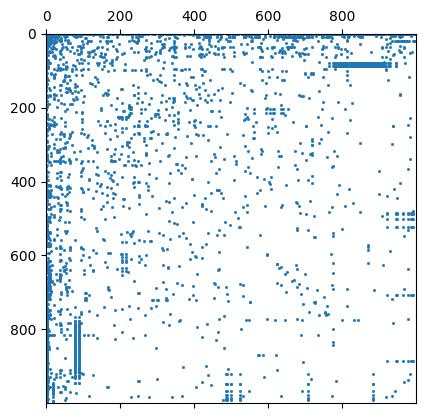

In [6]:
A_nt = symm.naive_transform(adjacency_matrix)
plt.spy(A_nt, markersize=1)

In [7]:
model_nt = SpectralClustering(4, affinity='precomputed').fit(A_nt)
clusters_nt = model_nt.labels_

c:\Users\NCROS\anaconda3\envs\solana_transaction_clustering\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


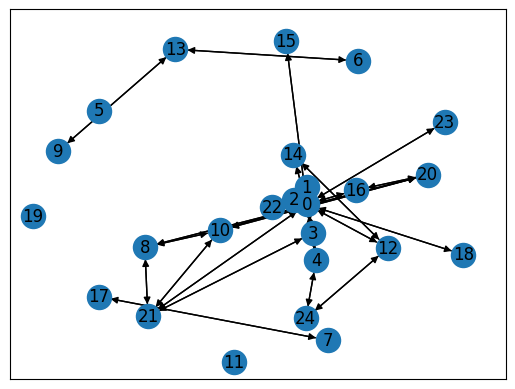

In [8]:
graph_nt = nx.from_numpy_array(A_nt[:25, :25], create_using=nx.DiGraph)
nx.draw_networkx(graph_nt)

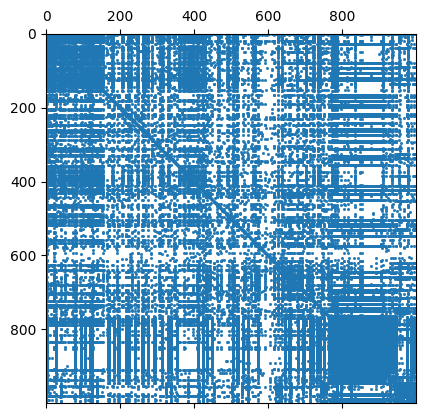

In [9]:
A_bst = symm.bibliosymmetric_transform(adjacency_matrix)
plt.spy(A_bst, markersize=1)

In [10]:
model_bst = SpectralClustering(3, affinity='precomputed').fit(A_bst)
clusters_bst = model_bst.labels_

c:\Users\NCROS\anaconda3\envs\solana_transaction_clustering\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


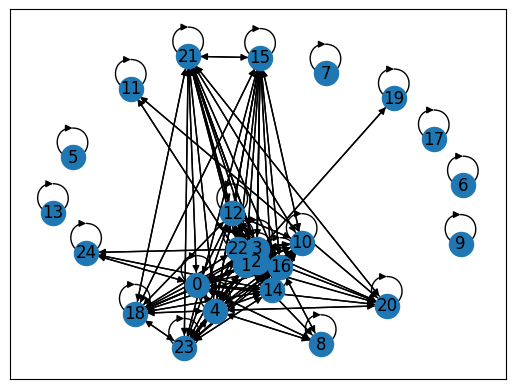

In [11]:
graph_bst = nx.from_numpy_array(A_bst[:25, :25], create_using=nx.DiGraph)
nx.draw_networkx(graph_bst)

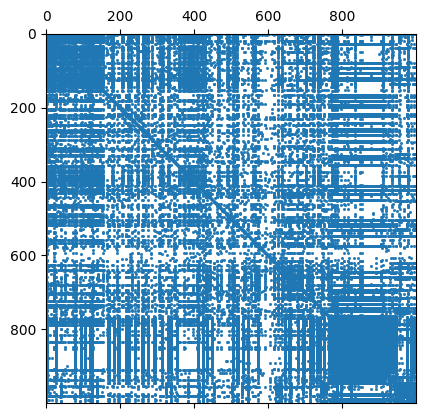

In [12]:
A_ddt = symm.degree_discount_transform(adjacency_matrix)
plt.spy(A_ddt, markersize=1)

In [13]:
model_ddt = SpectralClustering(3, affinity='precomputed').fit(A_ddt)
clusters_ddt = model_ddt.labels_

c:\Users\NCROS\anaconda3\envs\solana_transaction_clustering\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


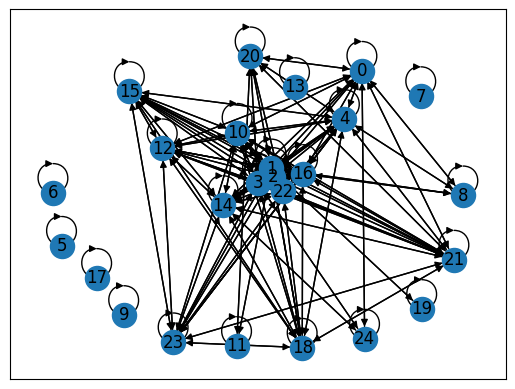

In [14]:
graph_ddt = nx.from_numpy_array(A_ddt[:25, :25], create_using=nx.DiGraph)
nx.draw_networkx(graph_ddt)

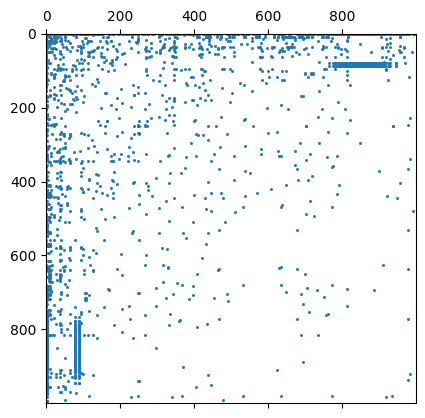

In [15]:
A_rwt = symm.random_walk(adjacency_matrix)
plt.spy(A_rwt, markersize=1)

In [16]:
model_rwt = SpectralClustering(4, affinity='precomputed').fit(A_rwt)
clusters_rwt = model_rwt.labels_

c:\Users\NCROS\anaconda3\envs\solana_transaction_clustering\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\NCROS\anaconda3\envs\solana_transaction_clustering\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


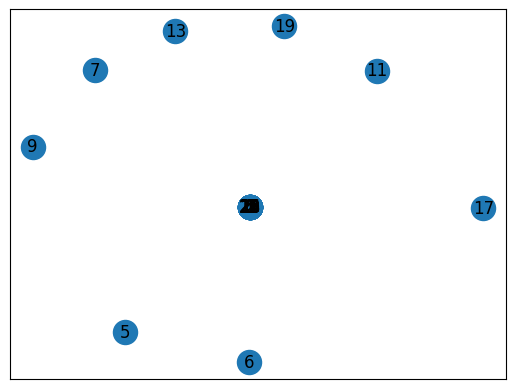

In [17]:
graph_rwt = nx.from_numpy_array(A_rwt[:25, :25], create_using=nx.DiGraph)
nx.draw_networkx(graph_rwt)

In [18]:
#add cluster labels to dataframe
eval_df['NT Labels'] = clusters_nt
eval_df['BST Labels'] = clusters_bst
eval_df['DDT Labels'] = clusters_ddt
eval_df['RWT Labels'] = clusters_rwt

## Reporting

In [38]:
def graph_distribution(df, label_str):
    fig, ax = plt.subplots(2, 2)
    fig.tight_layout()

    sns.kdeplot(data=df, x='Sent Amount', hue=label_str, ax=ax[0,0], palette='tab10')
    sns.kdeplot(data=df, x='Received Amount', hue=label_str, ax=ax[0,1], palette='tab10')
    sns.kdeplot(data=df, x='Sent Transactions', hue=label_str, ax=ax[1,0], palette='tab10')
    sns.kdeplot(data=df, x='Received Transactions', hue=label_str, ax=ax[1,1], palette='tab10')

    plt.show()


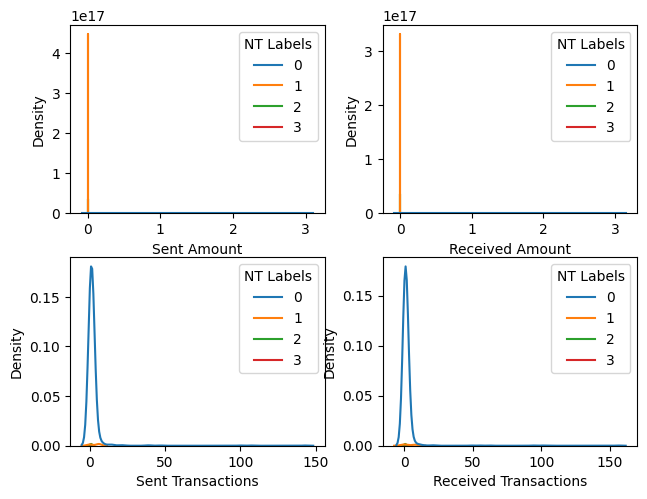

In [39]:
graph_distribution(eval_df, 'NT Labels')

C:\Users\NCROS\AppData\Local\Temp\ipykernel_39292\1862558527.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='Sent Amount', hue=label_str, ax=ax[0,0], palette='tab10')
C:\Users\NCROS\AppData\Local\Temp\ipykernel_39292\1862558527.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='Sent Transactions', hue=label_str, ax=ax[1,0], palette='tab10')
C:\Users\NCROS\AppData\Local\Temp\ipykernel_39292\1862558527.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='Received Transactions', hue=label_str, ax=ax[1,1], palette='tab10')


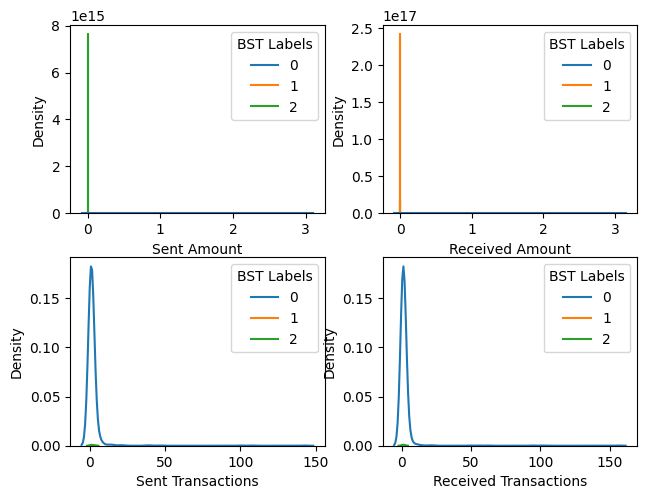

In [40]:
graph_distribution(eval_df, 'BST Labels')

C:\Users\NCROS\AppData\Local\Temp\ipykernel_39292\1862558527.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='Sent Amount', hue=label_str, ax=ax[0,0], palette='tab10')
C:\Users\NCROS\AppData\Local\Temp\ipykernel_39292\1862558527.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='Received Amount', hue=label_str, ax=ax[0,1], palette='tab10')
C:\Users\NCROS\AppData\Local\Temp\ipykernel_39292\1862558527.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='Sent Transactions', hue=label_str, ax=ax[1,0], palette='tab10')
C:\Users\NCROS\AppData\Local\Temp\ipykernel_39292\1862558527.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.

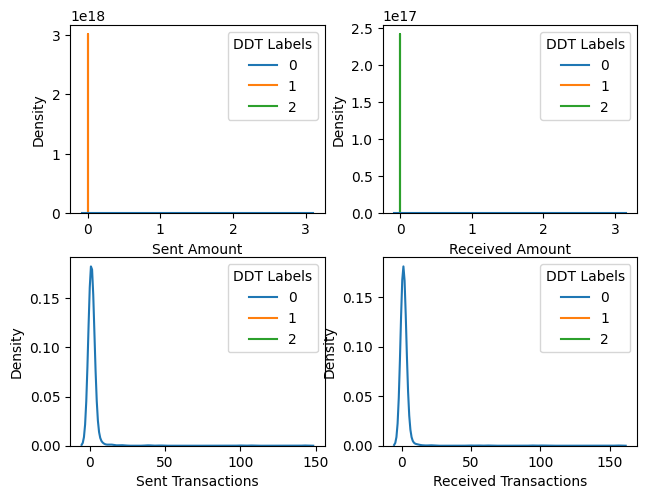

In [41]:
graph_distribution(eval_df, 'DDT Labels')

C:\Users\NCROS\AppData\Local\Temp\ipykernel_39292\1862558527.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='Sent Amount', hue=label_str, ax=ax[0,0], palette='tab10')
C:\Users\NCROS\AppData\Local\Temp\ipykernel_39292\1862558527.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='Received Amount', hue=label_str, ax=ax[0,1], palette='tab10')
C:\Users\NCROS\AppData\Local\Temp\ipykernel_39292\1862558527.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='Sent Transactions', hue=label_str, ax=ax[1,0], palette='tab10')
C:\Users\NCROS\AppData\Local\Temp\ipykernel_39292\1862558527.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.

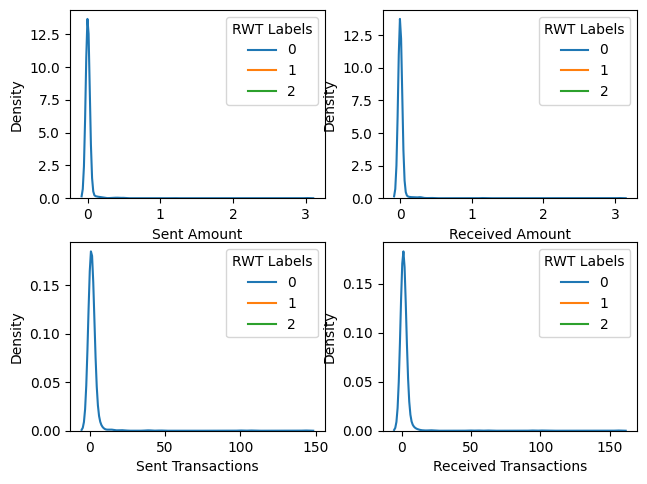

In [42]:
graph_distribution(eval_df, 'RWT Labels')